In [61]:
!pip install --upgrade nbformat
!pip install plotly
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install -U scikit-learn
!pip install yellowbrick

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import plotly.express as px

# Exploração dos dados

In [63]:
base_census = pd.read_csv("./assets/census.csv")

In [64]:
base_census

age          workclass  final-weight    education  education-num  \
0       39          State-gov         77516    Bachelors             13   
1       50   Self-emp-not-inc         83311    Bachelors             13   
2       38            Private        215646      HS-grad              9   
3       53            Private        234721         11th              7   
4       28            Private        338409    Bachelors             13   
...    ...                ...           ...          ...            ...   
32556   27            Private        257302   Assoc-acdm             12   
32557   40            Private        154374      HS-grad              9   
32558   58            Private        151910      HS-grad              9   
32559   22            Private        201490      HS-grad              9   
32560   52       Self-emp-inc        287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loos  hour-per-week  native-country  \
0         Male          2174             0             40   United-States   
1         Male             0             0             13   United-States   
2         Male             0             0             40   United-States   
3         Male             0             0             40   United-States   
4       Female             0             0             40            Cuba   
...        ...           ...           ...            ...             ...   
32556   Female             0             0             38   United-States   
32557     Male             0             0             40   United-States   
32558   Female             0             0             40   United-States   
32559     Male             0             0             20   United-States   
32560   Female         15024             0             40   United-States   

       income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [65]:
base_census.describe()

age  final-weight  education-num  capital-gain  capital-loos  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hour-per-week  
count   32561.000000  
mean       40.437456  
std        12.347429  
min         1.000000  
25%        40.000000  
50%        40.000000  
75%        45.000000  
max        99.000000

In [66]:
base_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

# Visualização de dados

In [67]:
np.unique(base_census["income"], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

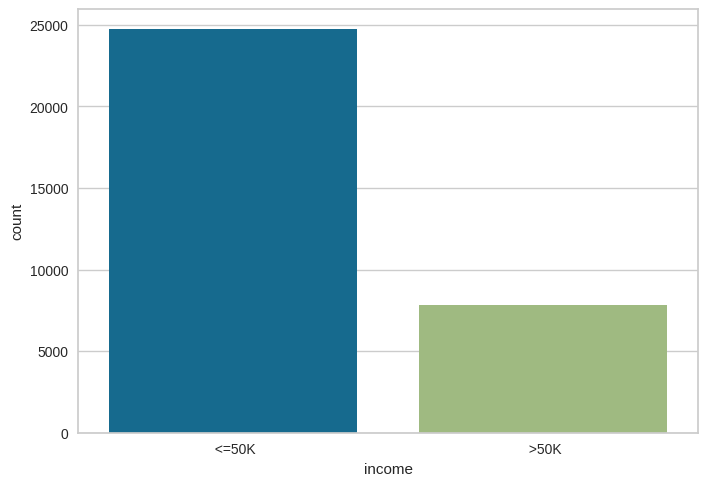

In [68]:
sns.countplot(x = base_census["income"]);

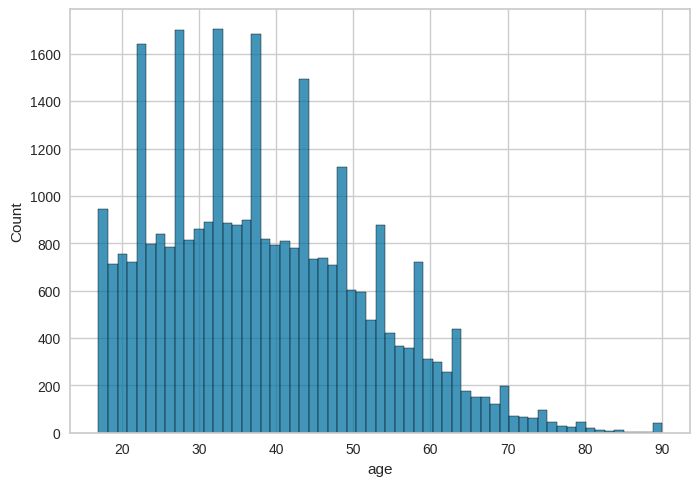

In [69]:
sns.histplot(x = base_census["age"]);

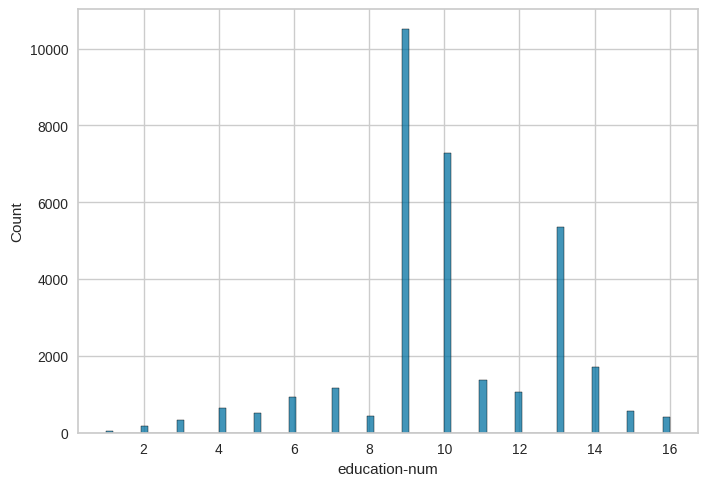

In [70]:
sns.histplot(x = base_census["education-num"]);

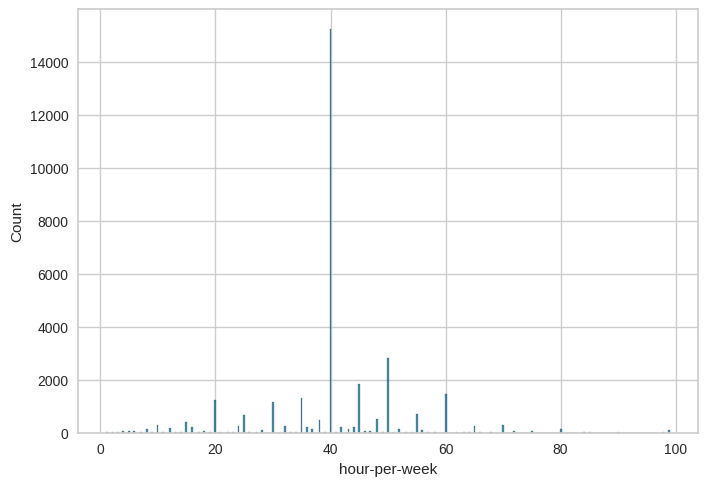

In [71]:
sns.histplot(x = base_census["hour-per-week"]);

In [72]:
grafico = px.treemap(base_census, path=["workclass", "age"])
grafico.show()

In [73]:
grafico = px.treemap(base_census, path=["occupation", "relationship"])
grafico.show()

In [74]:
grafico = px.parallel_categories(base_census, dimensions=["occupation", "relationship"])
grafico.show()

In [75]:
grafico = px.parallel_categories(base_census, dimensions=["workclass", "occupation", "income"])
grafico.show()

In [76]:
grafico = px.parallel_categories(base_census, dimensions=["education", "income"])
grafico.show()

# Divisão entre previsores e classe

In [77]:
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [78]:
X_census = base_census.iloc[:, 0:14].values
X_census

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [79]:
X_census[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [80]:
Y_census = base_census.iloc[:, 14].values
Y_census

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [81]:
from sklearn.preprocessing import LabelEncoder

In [82]:
label_encoder_test = LabelEncoder()
teste = label_encoder_test.fit_transform(X_census[:, 1])

In [83]:
X_census[:, 1]

array([' State-gov', ' Self-emp-not-inc', ' Private', ..., ' Private',
       ' Private', ' Self-emp-inc'], dtype=object)

In [84]:
teste

array([7, 6, 4, ..., 4, 4, 5])

In [85]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()

In [86]:
X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])

In [87]:
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [88]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [89]:
onehotencoder_census = ColumnTransformer(
    transformers=[('OneHot', OneHotEncoder(), [1,3,5,6,7,8,9,13])], 
    remainder='passthrough'
)

In [90]:
X_census = onehotencoder_census.fit_transform(X_census).toarray()

In [91]:
X_census.shape

(32561, 108)

In [92]:
from sklearn.preprocessing import StandardScaler

scaler_census = StandardScaler()
X_census = scaler_census.fit_transform(X_census)

In [93]:
X_census

array([[-0.2444502 , -0.17429511, -0.26209736, ...,  0.1484529 ,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -2.22215312],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       ...,
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -1.65522476],
       [-0.2444502 , -0.17429511, -0.26209736, ...,  1.88842434,
        -0.21665953, -0.03542945]])

# Divisão da base de dados

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_census_train, X_census_test, Y_census_train, Y_census_test = train_test_split(
    X_census, Y_census,
    test_size=0.15,
    random_state=0 # ter a mesma divisão da base de dados
)

In [96]:
X_census_train.shape

(27676, 108)

In [97]:
X_census_test.shape

(4885, 108)

In [98]:
Y_census_train.shape

(27676,)

In [99]:
Y_census_test.shape

(4885,)

In [100]:
import pickle

In [101]:
with open("census.pkl", mode="wb") as file:
    pickle.dump([X_census_train, Y_census_train, X_census_test, Y_census_test], file)

# Base census

In [102]:
with open("./census.pkl", "rb") as file:
    X_cesus_train, y_census_train, X_census_test, y_census_test = pickle.load(file)

In [103]:
X_census_train.shape, y_census_train.shape

((27676, 108), (27676,))

In [104]:
X_census_test.shape, y_census_test.shape

((4885, 108), (4885,))

In [105]:
from sklearn.naive_bayes import GaussianNB

In [106]:
naive_census = GaussianNB()
naive_census.fit(X_census_train, y_census_train)

predict = naive_census.predict(X_census_test)

In [107]:
predict

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [108]:
y_census_test

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [114]:
from sklearn.metrics import accuracy_score, classification_report

In [110]:
accuracy_score(y_census_test, predict)

0.4767656090071648

In [111]:
from yellowbrick.classifier import ConfusionMatrix

0.4767656090071648

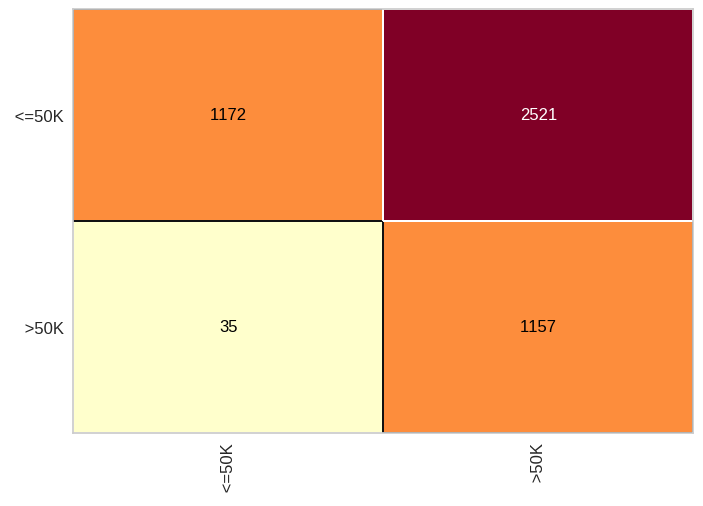

In [112]:
cm = ConfusionMatrix(naive_census)
cm.fit(X_census_train, y_census_train)
cm.score(X_census_test, y_census_test)

In [115]:
print(classification_report(y_census_test, predict))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885

